# 5. 線形系回帰予測 ~20

線形回帰とは、回帰分析の中でも、目的変数と説明変数の関係性を線形で表す手法のことを指す(線形系ではない回帰分析の主な手法はDecision Treesがある)

## 線形回帰アルゴリズム
- 重回帰
  - 複数の説明変数(features)を用いて、1つの目的変数を予測する
- LASSO回帰
  - 重回帰に過学習を抑えるための仕組みを導入したもの
  - 最小二乗法に正則化項(`L1ノルム`)を加えているもの
    - L1ノルム: 特定の説明変数の重みを0にすることができるため解釈が容易になるが全ての説明変数が重要である場合は適していない
- Ridge回帰
  - 重回帰に過学習を抑えるための仕組みを導入したもの
  - 最小二乗法に正則化項(`L2ノルム`)を加えているもの
    - L2ノルム: 説明変数の重みを0に近づけることができるが、完全に0にはならないため解釈が難しくなる


## 5.1 データを加工

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import warnings
warnings.simplefilter('ignore', FutureWarning)
boston = load_boston()

print(boston.data[:5])
print(boston.feature_names)
print(boston.target[:5])

boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [2]:
X = boston_df[boston.feature_names]
y = boston_df[['MEDV']]

display(X.head())
display(y.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(len(x_train))
display(x_train.head())
print(len(x_test))
display(x_test.head())

354


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93


152


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34


## 5.2 データをスケーリング

- 標準化
  - 説明変数の平均が`0`、標準偏差が`1`になるようにスケーリング
  - 正規分布に対して有効
- 正規化
  - 説明変数の値が`0 ~ 1`の範囲に収まるようにスケーリング
  - 一様分布に対して有効
- ロバストスケーリング
  - 正規分布、一様分布でもないケースで利用されることが多い

今回は標準化を採用して、モデル構築を行う

In [4]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
x_train_scaled = std_scaler.fit_transform(x_train)
x_test_scaled = std_scaler.fit_transform(x_test)

print(x_train_scaled[:3])
print(x_test_scaled[:3])

[[-0.20735619 -0.49997924  1.54801583 -0.26360274  0.58821309 -1.83936729
   1.10740225 -1.1251102  -0.61816013  0.20673466  1.2272573   0.42454294
   3.10807269]
 [-0.38886492  0.34677427 -0.58974728 -0.26360274 -0.79782145  0.32748658
  -0.36766106  0.07509    -0.73363701 -1.04949303  0.05696346  0.40185312
  -0.66643035]
 [-0.33573486 -0.49997924  1.54801583 -0.26360274  0.58821309  0.03790703
   1.04311378 -0.79998434 -0.61816013  0.20673466  1.2272573   0.39846135
   0.63936662]]
[[-0.45379523 -0.45888196 -1.2285158  -0.29277002 -0.7850976   0.14806054
  -1.7758721   0.61364717 -0.68477673  0.04137254 -0.74998219  0.26955997
  -0.79993845]
 [ 0.55063352 -0.45888196  1.04438686 -0.29277002  0.68330592 -0.0188666
   1.14170823 -1.23391041  1.59531227  1.49212109  0.88492032  0.18133643
  -0.49829647]
 [-0.44864325 -0.45888196  0.40044876  3.41565026 -0.01225364  0.20512964
   0.873911   -0.23183135 -0.57077228 -0.90530236 -0.99769469  0.4499995
  -0.36469248]]


## 5.3 重回帰モデルの構築(回帰 Equations)

### 単回帰
学習により傾き(a)と切片(b)を求める

$$
y = ax + b
$$

### 重回帰
学習により各説明変数の重み(w1 ~ w)と切片bを求める

$$
y = w_1x_1 + w_2x_2 + w_3x_3 + ... + w_ix_i + b
$$

In [25]:
from sklearn.linear_model import LinearRegression

multi_reg = LinearRegression().fit(x_train, y_train)
y_train_pred = multi_reg.predict(x_train)
y_test_pred = multi_reg.predict(x_test)


print(y_train_pred.shape)
print(y_train.shape)

(354, 1)
(354, 1)


## 5.4 重回帰モデルを評価

残差のプロット

$$
y = \hat{y} - y_i
$$

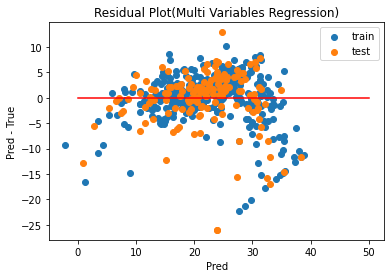

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

def residual_plot(y_train_pred_ds, y_train_ds, y_test_pred_ds, y_test_ds):
  plt.scatter(y_train_pred_ds, y_train_pred_ds - y_train_ds, label='train')
  plt.scatter(y_test_pred_ds, y_test_pred_ds - y_test_ds, label='test')
  plt.plot([0, 50], [0, 0], color='red')
  plt.xlabel('Pred')
  plt.ylabel('Pred - True')
  plt.title('Residual Plot(Multi Variables Regression)')
  plt.legend()
  plt.show()

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [49]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_error, r2_score
from pandas import DataFrame
import numpy as np


def get_eval_score(y_true: DataFrame, y_pred: DataFrame) -> None:
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  r2score = r2_score(y_true, y_pred)
  print('MAE : {:.5f}'.format(mae))
  print('MSE : {:.5f}'.format(mse))
  print('RMSE: {:.5f}'.format(rmse))
  print('R2  : {:.5f}'.format(r2score))


print("Training Dataset")
get_eval_score(y_train, y_train_pred)
print()
print("Validation Dataset")
get_eval_score(y_test, y_test_pred)

Training Dataset
MAE : 3.48837
MSE : 24.71652
RMSE: 4.97157
R2  : 0.70841

Validation Dataset
MAE : 3.82980
MSE : 32.34504
RMSE: 5.68727
R2  : 0.61154


## 5.5 各説明変数の重みを確認

各wとbの値を求める

In [50]:
print(multi_reg.coef_[0][:5])

[-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01]


In [51]:
for i, (col, coef) in enumerate(zip(boston.feature_names, multi_reg.coef_[0])):
  print(f'w{i}({col} = {coef})')
print(f'b = {multi_reg.intercept_[0]}')

w0(CRIM = -0.1213104009683465)
w1(ZN = 0.04446642542889436)
w2(INDUS = 0.011341694511902634)
w3(CHAS = 2.511246424491414)
w4(NOX = -16.231252902856248)
w5(RM = 3.85906800982518)
w6(AGE = -0.009985165654561784)
w7(DIS = -1.50026956326501)
w8(RAD = 0.24214346605810994)
w9(TAX = -0.011071612402086276)
w10(PTRATIO = -1.0177526384185984)
w11(B = 0.006814465447642762)
w12(LSTAT = -0.4867380656449212)
b = 37.937107741833294


## 5.6 LASSO回帰モデルの構築

LASSO回帰は、重みが大きくなるのを抑えるために、重回帰による各変数の重みの算出に`正規化項`というペナルティを設けている

この正規化項は`L1ノルム`と言われ、変数の重みを`0`に近づけると同時に、特定の変数の重みを完全に`0`にする効果がある

この効果により、過学習を抑えられるだけでなく、一部の変数の重みが`0`になることでモデルがシンプルになり、解釈が容易になるメリットがある

In [52]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(x_train, y_train)
y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)

In [53]:
import numpy as np
print(y_train_pred.shape)
print(y_train.shape)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)
print(y_train_pred.shape)
print(y_test_pred.shape)

(354,)
(354, 1)
(354, 1)
(152, 1)


In [54]:
print("Training Dataset")
get_eval_score(y_train, y_train_pred)
print()
print("Validation Dataset")
get_eval_score(y_test, y_test_pred)

Training Dataset
MAE : 3.48837
MSE : 24.71652
RMSE: 4.97157
R2  : 0.70841

Validation Dataset
MAE : 3.82980
MSE : 32.34504
RMSE: 5.68727
R2  : 0.61154


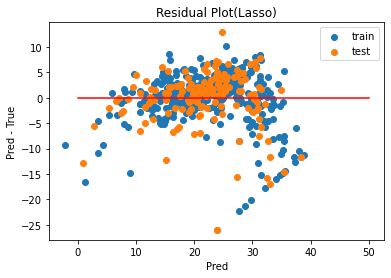

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_train_pred, y_train_pred - y_train, label='train')
plt.scatter(y_test_pred, y_test_pred - y_test, label='test')
plt.plot([0,50], [0,0], color='red')
plt.xlabel('Pred')
plt.ylabel('Pred - True')
plt.title('Residual Plot(Lasso)')
plt.legend()
plt.show()

In [56]:
for i, (col, coef) in enumerate(zip(boston.feature_names, multi_reg.coef_[0])):
  print(f'w{i}({col} = {coef})')
print(f'b = {lasso.intercept_[0]}')

w0(CRIM = -0.1213104009683465)
w1(ZN = 0.04446642542889436)
w2(INDUS = 0.011341694511902634)
w3(CHAS = 2.511246424491414)
w4(NOX = -16.231252902856248)
w5(RM = 3.85906800982518)
w6(AGE = -0.009985165654561784)
w7(DIS = -1.50026956326501)
w8(RAD = 0.24214346605810994)
w9(TAX = -0.011071612402086276)
w10(PTRATIO = -1.0177526384185984)
w11(B = 0.006814465447642762)
w12(LSTAT = -0.4867380656449212)
b = 44.96545323181172
